# 1.0 - importando bibliotecas e tabela utilizadas

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, plot_confusion_matrix
import numpy as np
import imblearn as imb

In [2]:
#importando tabela já tratada
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '1oQFORyLutSSA_NqokmH7E1Gpt3fZjON2'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './tabela_tratada.csv', 
                                    showsize = True)

tabela_tratada = pd.read_csv("tabela_tratada.csv")

256.0 KiB Done.


In [3]:
tabela_tratada

,pacientes,tumor,nodulo,metastese,ultinfo_1,ultinfo_2,ultinfo_3,ultinfo_4,tempo_de_amamentacao,subtipo_tumoral,...,primeira_menstruacao,fumante,alcolatra,grau_parentesco_1,grau_parentesco_2,grau_parentesco_3,tipo_tumor,benigno/maligno,idade,class_sobrevida
0,54,99,99,99,0,1,0,0,-1,2,...,-1,2,2,1,0,0,2,2,74,4
1,302,2,0,0,0,0,0,1,-1,3,...,-1,2,2,0,0,0,2,2,59,2
2,710,3,1,0,0,1,0,0,-1,2,...,-1,2,2,0,0,0,2,2,67,3
3,752,2,0,0,0,1,0,0,-1,3,...,-1,2,2,0,0,0,2,2,68,4
4,1589,2,1,0,0,1,0,0,-1,3,...,-1,2,2,0,0,0,2,2,51,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,82057,42,1,0,0,1,0,0,84,3,...,11,2,2,0,0,0,2,2,63,1
4130,82059,42,2,0,0,1,0,0,84,3,...,11,2,2,0,0,0,2,2,62,1
4131,82122,2,0,0,0,1,0,0,84,3,...,11,2,2,0,0,0,2,2,62,1
4132,82205,44,1,1,1,0,0,0,84,4,...,11,2,2,0,0,0,2,2,62,1


#2.0 - Testando o Modelo Preditivo#

Para testar os modelos de predição, foi necessário saber qual melhor se encaixava com nossos dados e nosso problema. Sendo assim, preferimos nesse momento verificar a acurácia de alguns modelos mais utilizados e ver como os dados se comportam com o treinamento e teste.<br><br>
Na célula de código abaixo, é possível visualizar a definição das variáveis de entrada e saída do modelo preditivo, bem como a porcentagem desses dados que foram selecionados para treino e para teste.

In [4]:
#separando os dados:
x_entrada = tabela_tratada[['tumor','nodulo','metastese', 'tempo_de_amamentacao',
                         'fumante', 'alcolatra','primeira_menstruacao',
                       'grau_parentesco_1','grau_parentesco_2', 'grau_parentesco_3',
                       'tipo_tumor', 'idade']].values
                       
y_saida = tabela_tratada['class_sobrevida'].values

X_train, X_test, Y_train, Y_test = train_test_split(x_entrada, y_saida, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

## **2.1 - KNN**

Buscamos utilizar o KNN para observar as amostras vizinhas e encontrar, com base nas comparações, novas predições. <br><br>

A ideia principal do KNN é determinar o rótulo de classificação de uma amostra baseado nas amostras vizinhas advindas de um conjunto de treinamento. Dessa forma, é possível predizer um resultado com base na comparação dos dados mais próximos e retorná-lo em forma de uma classificação. 

### 2.1.1 - KNN sem hiper-parâmetros

Em um primeiro momento, foi decidido testar o modelo classificatório sem o uso de hiper-parâmetros, visando observar como os nossos dados tratados interferem no módelo sem qualquer influência de manipulaçã

In [5]:
#testando o modelo
model_knn= KNeighborsClassifier(n_neighbors=23)
model_knn.fit(X_train, Y_train)

Y_pred_knn = model_knn.predict(X_test)

In [6]:
print('Acc treino: ', model_knn.score(X_train, Y_train ))
print('Acc teste: ', model_knn.score(X_test, Y_test.squeeze() ))
print('Revocação:',recall_score(Y_test,Y_pred_knn,average=None))
print('Precisão:',precision_score(Y_test,Y_pred_knn,average=None))
print('F1_score:',precision_score(Y_test,Y_pred_knn,average=None))

Acc treino:  0.5831316972001382
Acc teste:  0.5028203062046737
Revocação: [0.29245283 0.71080139 0.4742268  0.        ]
Precisão: [0.42906574 0.57708628 0.3755102  0.        ]
F1_score: [0.42906574 0.57708628 0.3755102  0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


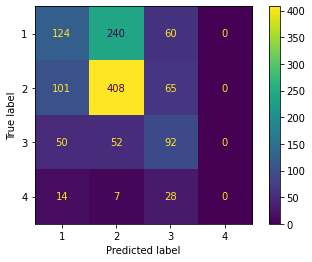

In [7]:
print('KNN')
plot_confusion_matrix(model_knn, X_test, Y_test)  
plt.show()

Como pôde ser percebido, o modelo sem o uso de qualquer hiper-parâmetro possui uma acurácia de teste de 60% , indicando uma forte taxa de erro do modelo em cima de predições falso negativas e positivas, visto que a quantidade de desses tipos de erros é inversamente proporcional à pontuação da acurácia.Entretanto, ainda que possuam uma considerável taxa de erro, ainda mostra um desempenho melhor que o modelo anterior para esse mesmo tipo de teste.

### 2.2.2 KNN com hiper-parâmetros(Grid Search)

Visando buscar melhores resultados para o KNN, foi utilizado a ferramenta de busca de hiper-parâmetros Grid Search, que realiza vários testes com base nos hiper-perâmetros pré selecionados e retorna o melhor resultado dentre todas essa repetiçoes do modelo.
<br><br>
Dessa forma, decidimos usar testar diferentes valores e características para os seguintes parâmetros:<br><br>
**N_neighbors**: número de amostras vizinhas utilizadas pelo modelo para a comparação;

**Weights**: Peso que cada dado da amostra possui sobre a decisão final do modelo, podendo ser ele uniforme("uniform") para todos os dados ou inversamente proporcional a distancia da amostra analisada("distance");

**Algorithm**: Qual o tipo de algoritimo será utilizado para a testagem do modelo, podeno ser esse algorítimo "ball_tree", "kd_tree" ou "brute";

**leaf_size**: Tamanho da folha passado para o parâmetro "ball_tree" ou "kd_tree".

A seguir, é possível visualizar o código resposnsável pelos testes com os diferentes parâmetros seguido de sua respectiva pontuação:


In [8]:
from sklearn.model_selection import GridSearchCV
# Cria o GridSearchCV

parameters_knn = {'n_neighbors':range(5,110,5), 
              'weights':['uniform','distance'],
              'algorithm':['ball_tree','kd_tree','brute'],
              'leaf_size':range(5,50,5)
              }
grid_knn = GridSearchCV(KNeighborsClassifier(), parameters_knn)
# Treina os modelos e guarda na variável modelGS o melhor modelo
grid_knn.fit(X_train, Y_train)

modelGS_knn= grid_knn.best_estimator_

y_pred_knn = modelGS_knn.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred_knn)



In [9]:
print(grid_knn.best_score_)
print(grid_knn.best_params_)

0.5447496279828604
{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 100, 'weights': 'distance'}


In [10]:
print('Acc treino:',modelGS_knn.score(X_train,Y_train))
print('Acc teste:',accuracy_score(Y_test,y_pred_knn.squeeze()))
print('Revocação:',recall_score(Y_test,y_pred_knn,average=None))
print('Precisão:',precision_score(Y_test,y_pred_knn,average=None))
print('F1_score:',f1_score(Y_test,y_pred_knn,average=None))

Acc treino: 0.9716557207051504
Acc teste: 0.5036261079774376
Revocação: [0.27358491 0.7195122  0.49484536 0.        ]
Precisão: [0.44787645 0.57520891 0.36781609 0.        ]
F1_score: [0.33967789 0.63931889 0.42197802 0.        ]


KNN


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


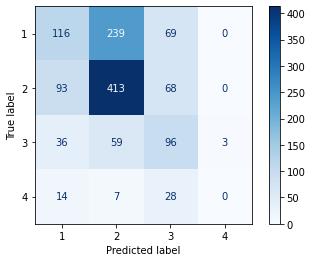

In [11]:
print('KNN')
plot_confusion_matrix(modelGS_knn, X_test, Y_test, cmap='Blues', values_format='.0f');

Como pôde ser visualizado, utilizando dos melhores hiper-parâmetros para o modelo segundo o Grid Search, a acurácia teve um aumento de apenas 1% em relação ao knn anterior e, visto o aumento pouco significativodas outras métricas, acredita-se que o resultado aponte para um problema no processo de feature engineering que no pôde ser corrigido somente por meio de hiper-parâmetros

###2.1.3- KNN com hiper-parâmetros(Randomized Search)

Buscando ainda analisar outros modelos de busca de hiper-parâmetros para servir de comparação com os resultados obtidos, foi o utilizado também o Randomized Search para a busca dos melhores hiper-parâmetros.

Dessa forma, decidimos testar diferentes valores e características para os mesmos parâmetros mencionados acima, utilizando o código a seguir responsável por selecionar os parâmetros para teste e aplicar no modelo :<br><br>




In [12]:
parametros_knn={
    'n_neighbors':range(5,110,5),
    'weights':['uniform','distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':range(5,50,5),
}
randomized_search_knn = RandomizedSearchCV(estimator = KNeighborsClassifier(),param_distributions=parametros_knn)
randomized_search_knn.fit(X_train,Y_train.squeeze())

modelRS_knn = randomized_search_knn.best_estimator_

y_predRS_knn = modelRS_knn.predict(X_test)

accuracy = accuracy_score(Y_test, y_predRS_knn)


In [13]:
print(randomized_search_knn.best_score_)
print(randomized_search_knn.best_params_)

0.5430225122661073
{'weights': 'distance', 'n_neighbors': 105, 'leaf_size': 45, 'algorithm': 'kd_tree'}


In [14]:
knn_best= randomized_search_knn.best_estimator_
knn_best
print('Acc treino:',knn_best.score(X_train,Y_train))
print('Acc teste:',knn_best.score(X_test,Y_test.squeeze()))
print('Revocação:',recall_score(Y_test,y_predRS_knn,average=None))
print('Precisão:',precision_score(Y_test,y_predRS_knn,average=None))
print('F1_score:',precision_score(Y_test,y_predRS_knn,average=None))

Acc treino: 0.9716557207051504
Acc teste: 0.5052377115229654
Revocação: [0.28066038 0.7195122  0.48969072 0.        ]
Precisão: [0.4490566  0.57843137 0.36679537 0.        ]
F1_score: [0.4490566  0.57843137 0.36679537 0.        ]


KNN


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


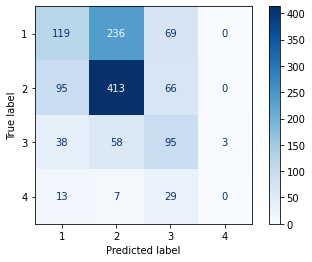

In [15]:
print('KNN')
plot_confusion_matrix(modelRS_knn, X_test, Y_test, cmap='Blues', values_format='.0f')

Como pôde ser visualizado, utilizando os melhores hiper-parâmetros segundo o Randomized Search, o modelo teve o mesmo aumento de acurácia de 1% em comparação ao modelo original, além das demais métricas permanecerem sem variações significativas, reforçando o hipótese do problema de manipulação dos dados.

##**2.2 - Random Forest**

A ideia principal do Random Forest é fazer o agrupamento de uma série de árvores de decisão criadas durante o processo de treinamento do modelo gerar predições (nesse caso classificatórias) com base nas comparações conjunta entre as estruturas arbóreas desenvolvidas<br><br>
Esse modelo foi utilizado como mais uma métrica de comparação entre qual modelo classificatório seria o mais adequado para o problema em análise.

###2.2.1- Random Forest sem hiper-parâmetros

Em um primeiro momento, foi decidido testar o modelo classificatório sem o uso de hiper-parâmetros, visando observar como os nossos dados tratados interferem no módelo sem qualquer influência de manipulação.

In [16]:
#testando o modelo
model_rf= RandomForestClassifier(random_state=3,n_estimators=100, max_depth = 30, criterion = 'gini')
model_rf.fit( X_train, Y_train)

Y_pred_rf = model_rf.predict(X_test)

In [17]:
print('Acc treino: ', model_rf.score(X_train, Y_train ))
print('Acc teste: ', model_rf.score(X_test, Y_test.squeeze() ))
print('Revocação:',recall_score(Y_test,Y_pred_rf,average=None))
print('Precisão:',precision_score(Y_test,Y_pred_rf,average=None))
print('F1_score:',precision_score(Y_test,Y_pred_rf,average=None))

Acc treino:  0.9716557207051504
Acc teste:  0.5487510072522159
Revocação: [0.49764151 0.67247387 0.42268041 0.04081633]
Precisão: [0.52227723 0.6369637  0.3923445  0.09090909]
F1_score: [0.52227723 0.6369637  0.3923445  0.09090909]


Random Forest


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


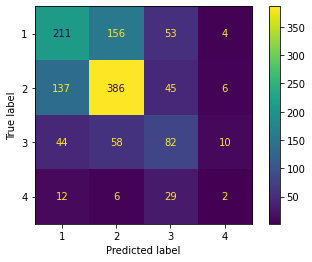

In [18]:
print('Random Forest')
plot_confusion_matrix(model_rf, X_test, Y_test)  
plt.show()

Como pôde ser percebido, o modelo sem o uso de qualquer hiper-parâmetro possui uma acurácia de teste de 56% , indicando uma forte taxa de erro do modelo em cima de predições falso negativas e positivas, visto que a quantidade de desses tipos de erros é inversamente proporcional à pontuação da acurácia.Entretanto, a baixa acurácia( fortememnte influenciada pelos falsos positivos) e alta revocação(fortemente influenciada pelos falsos negativos) indica que o modelo erra mais os falsos positivos que os falsos negativos

###2.2.2 - Random Forest com hiper-parâmetros(Grid Search)

Visando buscar melhores resultados para o Random Forest, foi utilizado a ferramenta de busca de hiper-parâmetros Grid Search, que realiza vários testes com base nos hiper-perâmetros pré selecionados e retorna o melhor resultado dentre todas essa repetiçoes do modelo.

Dessa forma, decidimos usar testar diferentes valores e características para os seguintes parâmetros:<br><br>
**N_estimators**: número de árvores utilizadas no modelo;

**Criterion**: função utilizada para a qualidade de uma divisão. Os critérios suportados são “gini” para a impureza Gini e “log_loss” e “entropia” ambos para o ganho de informação de Shannon, que diz que a quantidade de informação de um evento A depende apenas da probabilidade p(A) desse evento, e é tanto maior quanto menor for a probabilidade.

**Mim_samples_split**: define o número mínimo de amostras necessárias para dividir um nó interno.


A seguir, é possível visualizar o código resposnsável pelos testes com os diferentes parâmetros, seguido de sua respectiva pontuação:


In [19]:
from sklearn.model_selection import GridSearchCV
# Cria o GridSearchCV

parameters_rf = {'n_estimators':range(50,250, 50), 
              'criterion':['gini','entropy','log_loss'],
              'min_samples_split':range(2,8,2),
              }
grid_rf = GridSearchCV(RandomForestClassifier(), parameters_rf)
# Treina os modelos e guarda na variável modelGS o melhor modelo
grid_rf.fit(X_train, Y_train)

modelGS_rf = grid_rf.best_estimator_

y_pred_rf = modelGS_rf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred_rf)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

In [20]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)

0.5762118196867287
{'criterion': 'entropy', 'min_samples_split': 6, 'n_estimators': 150}


In [21]:
print('Acc treino:',modelGS_rf.score(X_train,Y_train))
print('Acc teste:',modelGS_rf.score(X_test,y_pred_rf))
print('Revocação:',recall_score(Y_test,y_pred_rf,average=None))
print('Precisão:',precision_score(Y_test,y_pred_rf,average=None))
print('F1_score:',precision_score(Y_test,y_pred_rf,average=None))

Acc treino: 0.8897338403041825
Acc teste: 1.0
Revocação: [0.49528302 0.69163763 0.48453608 0.02040816]
Precisão: [0.54404145 0.64869281 0.40517241 0.09090909]
F1_score: [0.54404145 0.64869281 0.40517241 0.09090909]


Random Forest


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


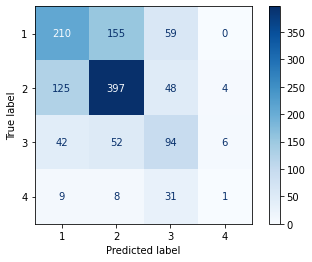

In [22]:
print('Random Forest')
plot_confusion_matrix(modelGS_rf, X_test, Y_test, cmap='Blues', values_format='.0f');

Como pôde ser visualizado, utilizando dos melhores hiper-parâmetros para o modelo segundo o Grid Search, a acurácia teve um surpreendente aumento para 100% de acurácia de teste mas que não foi acompanhado por um aumento das outras métricas, indicando que essa surpreendente pontuação possui grandes chances de estar ligada à um vício do modelo em relação à alguns dados

###2.2.3- Random Forest com hiper-parâmetros(Randomized Search)

Buscando ainda analisar outros modelos de busca de hiper-parâmetros para servir de comparação com os resultados obtidos, foi o utilizado também o Randomized Search para a busca dos melhores hiper-parâmetros.

Dessa forma, decidimos testar diferentes valores e características para os mesmos parâmetros mencionados acima, utilizando o código a seguir responsável por selecionar os parâmetros para teste e aplicar no modelo :

In [23]:
parametros_rf={
    'n_estimators':range(50,350,50),
    'criterion':['gini','entropy','log_loss'],
    'min_samples_split':range(2,10,2),
}
randomized_search_rf=RandomizedSearchCV(estimator = RandomForestClassifier(),param_distributions=parametros_rf)
randomized_search_rf.fit(X_train,Y_train.squeeze())

modelRS_rf = randomized_search_rf.best_estimator_

y_predRS_rf = modelRS_rf.predict(X_test)

accuracy = accuracy_score(Y_test, y_predRS_rf)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

In [24]:
print(randomized_search_rf.best_score_)
print(randomized_search_rf.best_params_)

0.5775947074959212
{'n_estimators': 150, 'min_samples_split': 8, 'criterion': 'gini'}


In [25]:
print('Acc treino:',modelRS_rf.score(X_train,Y_train))
print('Acc teste:',modelRS_rf.score(X_test,y_predRS_rf.squeeze()))
print('Revocação:',recall_score(Y_test,y_predRS_rf,average=None))
print('Precisão:',precision_score(Y_test,y_predRS_rf,average=None))
print('F1_score:',precision_score(Y_test,y_predRS_rf,average=None))

Acc treino: 0.8510197027307294
Acc teste: 1.0
Revocação: [0.50235849 0.69686411 0.4742268  0.        ]
Precisão: [0.55324675 0.64620355 0.40350877 0.        ]
F1_score: [0.55324675 0.64620355 0.40350877 0.        ]


Random Forest


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


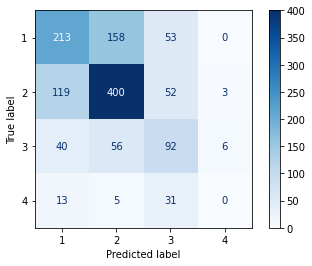

In [26]:
print('Random Forest')
plot_confusion_matrix(modelRS_rf, X_test, Y_test, cmap='Blues', values_format='.0f');

Como pôde ser visualizado, utilizando os melhores hiper-parâmetros segundo o Randomized Search, o modelo teve o mesmo aumento de acurácia para 100% sem a alteração das demais métricas, reforçando a teoria do vício do modelo durante o processo de treino.

##**2.3 - SVM**

O SVM é um algoritmo que busca uma linha de separação entre duas classes distintas, analisando os dois pontos, um de cada grupo, mais próximos da outra classe. Isto é, o SVM escolhe a reta entre dois grupos que se distancia mais de cada um e, após descoberta essa reta, o programa conseguirá predizer a qual classe pertence um novo dado ao checar de qual lado da reta ele está.<br><br>
Esse modelo foi utilizado como mais uma métrica de comparação entre qual modelo classificatório seria o mais adequado para o problema em análise.

###2.3.1- SVM sem hiper-parâmetros

Em um primeiro momento, foi decidido testar o modelo classificatório sem o uso de hiper-parâmetros, visando observar como os nossos dados tratados interferem no módelo sem qualquer influência de manipulação.


In [27]:
#testando o modelo
model_svm= SVC(random_state=3)
model_svm.fit( X_train, Y_train)

Y_pred_svm = model_svm.predict(X_test)

In [28]:
print('Acc treino: ', model_svm.score(X_train, Y_train ))
print('Acc teste: ', model_svm.score(X_test, Y_test.squeeze() ))
print('Revocação:',recall_score(Y_test,Y_pred_svm,average=None))
print('Precisão:',precision_score(Y_test,Y_pred_svm,average=None))
print('F1_score:',precision_score(Y_test,Y_pred_svm,average=None))

Acc treino:  0.5523677843069478
Acc teste:  0.5181305398871877
Revocação: [0.22877358 0.67421603 0.81958763 0.        ]
Precisão: [0.52150538 0.63546798 0.35650224 0.        ]
F1_score: [0.52150538 0.63546798 0.35650224 0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


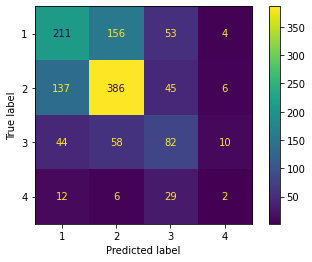

In [29]:
print('SVM')
plot_confusion_matrix(model_rf, X_test, Y_test)  
plt.show()

Como pôde ser percebido, o modelo sem o uso de qualquer hiper-parâmetro possui uma acurácia de teste de 62% , indicando uma forte taxa de erro do modelo em cima de predições falso negativas e positivas, visto que a quantidade de desses tipos de erros é inversamente proporcional à pontuação da acurácia.Entretanto, a baixa acurácia( fortememnte influenciada pelos falsos positivos) e alta revocação(fortemente influenciada pelos falsos negativos) indica que o modelo erra mais os falsos positivos que os falsos negativos, ainda que o valor exorbitantemente alto da revocação (100%) sinalize para um vício do modelo durante o treinamento.

###2.3.2 - SVM com hiper-parâmetros(Grid Search)

Visando buscar melhores resultados para o SVM, foi utilizado a ferramenta de busca de hiper-parâmetros Grid Search, que realiza vários testes com base nos hiper-perâmetros pré selecionados e retorna o melhor resultado dentre todas essa repetiçoes do modelo.

Dessa forma, decidimos usar testar diferentes valores e características para os seguintes parâmetros:<br><br>

**Kernel**:Especifica o tipo de kernel a ser usado no algoritmo. Pode ser do tipo "rbf", "poly", "sigmoid" e "precomputed";

**Gama**: coeficiente de kernel para os tipos "rbf","poly" e "sigmoid". Pode receber os valores "scale" ou "auto";

**Degree**:grau da função kernel polinomial

A seguir, é possível visualizar o código resposnsável pelos testes com os diferentes parâmetros seguido de sua respectiva pontuação:

In [30]:
from sklearn.model_selection import GridSearchCV
# Cria o GridSearchCV

parameters_svm = {
              'kernel':['rbf'],
              'gamma':['scale','auto'],
              'degree':range(2,10,2)
              }
grid_svm = GridSearchCV(SVC(), parameters_svm)
# Treina os modelos e guarda na variável modelGS o melhor modelo
grid_svm.fit(X_train, Y_train)
modelo_SVM = grid_svm.best_estimator_

y_pred_svm = modelo_SVM.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred_svm)


In [31]:
print(grid_svm.best_score_)
print(grid_svm.best_params_)

0.5492496907327393
{'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [32]:
print('Acc treino:',modelo_SVM.score(X_train,Y_train))
print('Acc teste:',accuracy_score(Y_test, y_pred_svm))
print('Revocação:',recall_score(Y_test,y_pred_svm,average=None))
print('Precisão:',precision_score(Y_test,y_pred_svm,average=None))
print('F1_score:',f1_score(Y_test,y_pred_svm,average=None))

Acc treino: 0.5523677843069478
Acc teste: 0.5181305398871877
Revocação: [0.22877358 0.67421603 0.81958763 0.        ]
Precisão: [0.52150538 0.63546798 0.35650224 0.        ]
F1_score: [0.31803279 0.65426881 0.496875   0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


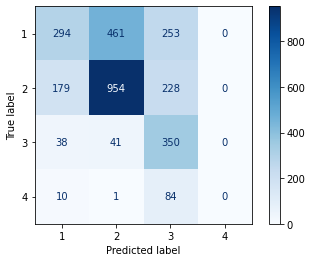

In [33]:
print('SVM')
plot_confusion_matrix(modelo_SVM, X_train, Y_train, cmap='Blues', values_format='.0f')

Como pôde ser visualizado, utilizando dos melhores hiper-parâmetros para o modelo segundo o Grid Search, as métricas de desempenho permanecem praticamente inalteradas( apenas um leve aumento do f1-score), sugerindo que mesmo com os melhores parâmetros para esse modelo, ainda é perceptível um forte ruído na manipulação dos dados.


### 2.3.3-SVM com hiper-parâmetros(Randomized Search)

Buscando ainda analisar outros modelos de busca de hiper-parâmetros para servir de comparação com os resultados obtidos, foi o utilizado também o Randomized Search para a busca dos melhores hiper-parâmetros.

Dessa forma, decidimos testar diferentes valores e características para os mesmos parâmetros mencionados acima, utilizando o código a seguir responsável por selecionar os parâmetros para teste e aplicar no modelo :

In [34]:
parametros_svm = {
    'kernel':['rbf'],#['linear','poly','rbf','sigmoid','precomputed'],
    'gamma':['scale','auto'],
    'degree':range(1,5)
}
randomized_search_svm = RandomizedSearchCV(estimator = SVC(),param_distributions=parametros_svm)
randomized_search_svm.fit(X_train,Y_train.squeeze())

modelRS_svm = randomized_search_svm.best_estimator_

y_predRS_svm = modelRS_svm.predict(X_test)

accuracy = accuracy_score(Y_test, y_predRS_svm)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [35]:
print(randomized_search_svm.best_score_)
print(randomized_search_svm.best_params_)

0.5492496907327393
{'kernel': 'rbf', 'gamma': 'scale', 'degree': 1}


In [36]:
svm_best= randomized_search_svm.best_estimator_
svm_best
print('Acc treino:',svm_best.score(X_train,Y_train))
print('Acc teste:',svm_best.score(X_test,Y_test.squeeze()))
print('Revocação:',recall_score(Y_test,y_predRS_svm,average=None))
print('Precisão:',precision_score(Y_test,y_predRS_svm,average=None))
print('F1_score:',precision_score(Y_test,y_predRS_svm,average=None))

Acc treino: 0.5523677843069478
Acc teste: 0.5181305398871877
Revocação: [0.22877358 0.67421603 0.81958763 0.        ]
Precisão: [0.52150538 0.63546798 0.35650224 0.        ]
F1_score: [0.52150538 0.63546798 0.35650224 0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


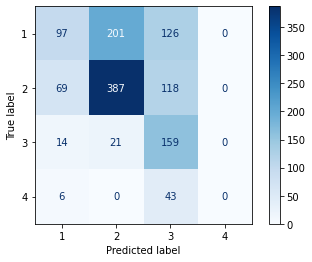

In [37]:
print('SVM')
plot_confusion_matrix(modelRS_svm, X_test, Y_test, cmap='Blues', values_format='.0f');

Como pôde ser visualizado, utilizando os melhores hiper-parâmetros segundo o Randomized Search, o modelo ainda obteve resultados quase sem nenhuma variação em relação ao modelo original, indicando que ambas as buscas por hiper-parâmetros possuem um forte ruído na feature engineering dos dados que compromete o pleno funcionamento do modelo.